```
BEGIN ASSIGNMENT
run_tests: true
requirements: requirements.txt
init_cell: false
check_all_cell: false
export_cell: false
generate:
    points: 50
    pdf: true
    pdfs:
        course_id: 'CS-UY 4563'
        assignment_id: 'HW1_prog'
```

# Programming Assignment 1:    Implementing Multiple Linear Regression Using Gradient Descent And Normal Equations.  Optional: Stochastic Gradient Descent Algorithm.

In this assignment you will use the California census data to build a model using linear regression to predict the housing prices in California.

This is a supervised machine learning task. 

The features are:
* median income in block group
*  median house age in block group
* average number of rooms per household
* average number of bedrooms per household
* block group population
* average number of household members
* block group latitude
* block group longitude

The target is to predict the median house price in a block. "A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data."  Your cost function is RSS.

In this assignment, you will load data, plot data, perform simple mathematical manipulations, and fit a linear regression model. The assignment uses the California housing data set, a widely-used machine learning data set for illustrating basic concepts.  You will:
* read the data and perform some preprocessing steps
* visually observe the data set
* compute  the coefficients/weights ${\bf w}$ using the gradient descent algorithm (a local optimizer) 
* compute ${\bf w}$ (again) this time using the normal equation (a global optimizer). You will compare the $\bf w$'s you recived from both algorithms.
* You will then compute the $R^2$ value by first computing $\hat{\bf y}, RSS$ and $TSS$.

We have done some of the steps for you.

Please add your own print statements to check your code to ensure your code It is correct in every step. (Note: we will not be grading the print statements you add to your code.)

## Before you start

For this semester, the teaching staff of this course will be using Autograder to grade programming assignment. Here are three things we would like you to know before starting. `PLEASE READ CAREFULLY.` Otherwise, you might not receive grades for some questions.

* If you see any blocks containing statements like `grader.check("Qxx")`, please `DO NOT MODIFY` them. You can add new cells to the notebook, but just make sure there is `NO OTHER CELLS` between the answer cells containing tag `# TODO Qxx` and grading cells like 'grader.check("Qxx")`. 

* If the instructions say that you are required to use certain names for output variables, please `FOLLOW THE instructions`. You can still create new variables, but just the make sure to `ASSIGN THE OUTPUT VARIABLES TO CORRECT VALUES`. 

* Some of the print statements are in the comments(print in Q17 and Q18 for example). Please feel free to use them, but you must `PUT THESE PRINT STATEMENTS IN COMMENTS` before you submit the programming assignment.

* Please `APPEND YOUR NYU NETID` to the name your submission (for example, name your submission as "HW1_prog_abc12345.ipynb" when you submit on Gradescope, and replace <abc1234> with your NYU NetID). 

The autograder does not account for all test cases and edge cases, meaning that it is possible to receive a different grade than what the Autograder assigns you. The teaching staff will grade all submissions manually. Thank you very much for your understanding, and good luck with programming assignment 1!

## Before You Begin
To ensure your environment is set up correctly, please install the necessary packages.

Installing **joblib** ensures you have the necessary tools to save and load models, making your code more efficient. While it only needs to be installed once, it’s important to run this installation in environments that reset, like Colab, or if you're working in a new environment, to avoid any issues during execution.

In [ ]:
from sympy.abc import alpha
# Run this cell if you don't have joblib already installed.
# It's safe to run even if joblib is already installed.

!pip install joblib

## Load the standard packages for working with data

In [ ]:
# run this code cell using shift+enter before moving further.   You will be writing the algorithm from scratch, but these standard packages will make your work cleaner and faster. 
import joblib

import numpy as np # library which more efficiently allows you to work with large multidimensional arrays and matrices.  It has functions that operate on the arrays/matrices
import pandas as pd # built on numpy.  Makes it easier to read in data and clean data among other things


from sklearn.datasets import fetch_california_housing # We will be using one of SKlearn's datasets

from sklearn.preprocessing import StandardScaler # Scaling is suggested when running a gradient descent algorithm

import matplotlib # a plotting library
from matplotlib import pyplot as plt
%matplotlib inline

## Loading the data

Here is some more information about the dataset.  The California housing data set was collected in 1990 to study the relationship between median house price and various factors.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning. This is one of the datasets that can be downloaded from scikit-learn.  You can learn about this dataset at https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Here is a brief description of the dataset provided by scikit-learn:
>The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

>This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

>An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts. 


In the lab, you will complete all the code marked `TODO`. 


In [ ]:
california_housing = fetch_california_housing(as_frame=True)  # load the housing dataset. By setting as_frame=True, the data will be a DataFrame
# To learn more about the interface - go to the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

# loading the data matrix as a DataFrame
data_df = california_housing.data
# loading the target vector as a DataFrame
target_df = california_housing.target

# Storing the feature names to be used later
feature_names = california_housing.feature_names

# Looking at the first 6 lines of the dataset
print(data_df.head(6))
print(target_df.head(6))


In [ ]:
# To read the description of the dataset, run the following line of code.
print(california_housing['DESCR'])


After loading the dataset, we should check for missing values.  

In [ ]:
# Check whether the dataset has any missing values.
data_df.isnull().sum()

In this dataset, we are told in the description there are no missing values." There are two main methods if we miss any value for numerical attributes. The first way is to delete the database instance (one row or column) with a null value. The second way is to impute the missing value, like filling in the mean.

## Preparing the Data



We haven't talked yet about splitting the dataset into train, validation and test so we won't be splitting the dataset in this assignment. In future assignments we would split the dataset before scaling the dataset.

Since we are running gradient descent, we will scale the dataset (you should see what happens if we don't scale dataset before running gradient descent).

In [ ]:
# TODO Q01
X= data_df.to_numpy() # converting the  Pandas dataframe `data_df' into a numpy array by typing: X = data_df.to_numpy().
# Remember this method for your next programming assignment.
y= target_df.to_numpy() # Now do the same for the target (label) dataframe `target_df'.

scale=StandardScaler() # create the scaler object

X_scaled = scale.fit_transform(X)  # Type "scale.fit_transform(X)" here

# Check the shape of X and y vectors.
print("shape of X: ", X_scaled.shape)  # We have 20640 examples and 8 features
print("shape of y: ", y.shape)  # Notice that y is a 1-D object

In [ ]:
grader.check("Q01")

Reshape y to be rank 2. After checking the shape of X_scaled and y in the above code cell, we see that X_scaled is already rank 2 but y is a rank 1 matrix. Before moving ahead, convert y to be rank 2 matrix. For example, I would use the command y = y.reshape(y.shape[0],1) to reshape.

In [ ]:
# TODO Q02
# Reshape y into a rank 2 matrix y_2d(<np.ndarray>)
y_2d = y.reshape(y.shape[0], 1)
print("shape of y_2d: ", y_2d.shape)

In [ ]:
grader.check("Q02")

Calculating the value of `N` i.e. number of training examples. 
Hint: Value of `N` is equal to the number of rows in either `X_scaled` or `y_2d`,  which can be accessed using numpy shape command.

In [ ]:
# TODO Q03
# Save number of training examples into N and print it
N = X_scaled.shape[0]
print("N: ", N)

In [ ]:
grader.check("Q03")

Next, add a column of ones to the front of $X$:
$$X=\begin{bmatrix}
1 & x^{(1)}_1 & \cdots & x^{(1)}_8\\
\vdots & \vdots & \vdots & \vdots\\
1 & x^{(20640)}_1 & \cdots & x^{(20640)}_8\\
\end{bmatrix}$$

In [ ]:
# TODO Q04
# Create a column of ones and name it as ones, then append it to X_scaled using hstack, name the new matrix 
# X_1(<np.ndarray>)
ones = np.ones((X_scaled.shape[0], 1))
X_1 = np.hstack((ones, X_scaled))
print("X_1:", X_1)

# Shape of X_1 should be (20640, 9)
print("shape of X_1: ", X_1.shape)

In [ ]:
grader.check("Q04")

Lets explore the housing prices 

Use the response vector `y` to find the mean house price in thousands and the fraction of blocks that are above \$300,000.

 Remember that: "The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000)." 

Create print statements of the form:

    The mean house price is xx.yy thousands of dollars.
    Only x.y percent are above $300,000.

In [43]:
# TODO Q05
mean_house_price = y.mean()
percent_over_300000 = (np.sum(y > 3.0) / y.shape[0]) * 100


In [ ]:
grader.check("Q05")

In [39]:
print(f"The mean house price is {mean_house_price:.7f} thousands of dollars.")
print(f"Only {percent_over_300000:.2f} are above $300,000.")

The mean house price is 2.0685582 thousands of dollars.
Only 18.59 are above $300,000.


#### If done correctly: The mean house price is 206,855.82 dollars. Only 18.59 percent are above $300,000.  (These numbers were rounded - so to check your answer, you need to round as well.)
#### And please notice that the database uses a different unit, so the print output should be 2.0685582 (rounded)

## Visualizing the data

Python's `matplotlib` has very good routines for **plotting and visualizing data** that closely follow the format of MATLAB programs. 

**Note**: in future programs, we will **split the data** into **training, validation, and test sets** before we do any data exploration.  The **validation** and **test sets will remain untouched** until we use them to evaluate the performance of our hypotheis (or hyotheses).

Next, we plot the relationship between the house price and each of our scaled features.

You might notice that some of the features are skewed to one side.  There are techniques for addressing this that you can read about on your own.

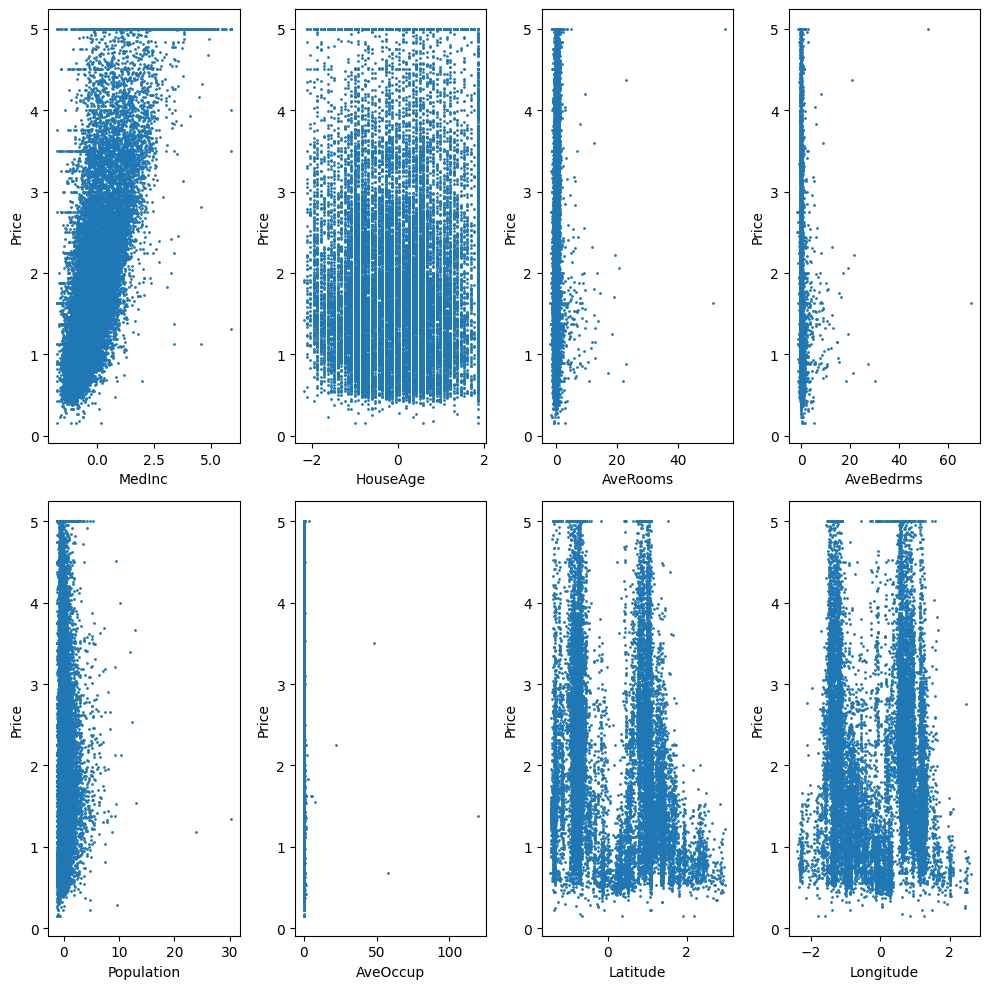

In [44]:
fig, axs = plt.subplots(2, 4, figsize=(10,10)) 

# top row
axs[0, 0].scatter(X_1[:,1],y, s=1)
axs[0, 0].set_xlabel(feature_names[0])
axs[0, 1].scatter(X_1[:,2],y, s=1)
axs[0, 1].set_xlabel(feature_names[1])
axs[0, 2].scatter(X_1[:,3],y, s=1)
axs[0, 2].set_xlabel(feature_names[2])
axs[0, 3].scatter(X_1[:,4],y, s=1)
axs[0, 3].set_xlabel(feature_names[3])

# bottom row
axs[1, 0].scatter(X_1[:,5],y, s=1)
axs[1, 0].set_xlabel(feature_names[4])
axs[1, 1].scatter(X_1[:,6],y, s=1)
axs[1, 1].set_xlabel(feature_names[5])
axs[1, 2].scatter(X_1[:,7],y, s=1)
axs[1, 2].set_xlabel(feature_names[6])
axs[1, 3].scatter(X_1[:,8],y, s=1)
axs[1, 3].set_xlabel(feature_names[7])

for ax in axs.flat:
    ax.set( ylabel='Price')
    
fig.tight_layout()

# This code could have been written more complactly as follows:
#for i in range (0,2):
#  for j in range (0,4):
#    axs[i, j].scatter(X_1[:,i*4+j+1],y, s=1)
#    axs[i, j].set_xlabel(feature_names[i*4+j])

By looking at the graphs, we can notice that only MedInc has a strong correlation with the price.  To have a more formal notion of how housing price relates to each feature we compute the standard correlation coefficient.

We will use one of the Panda functions to do this.  Thus we use the dataframes target_df and data_df.

In [45]:
data_df[feature_names].corrwith(target_df, axis=0).sort_values(ascending=False)

MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
dtype: float64

 We can visualize how correlated our features are with each other.  We will use the Pandas `scatter_matrix()` function.  (Pandas have some useful plotting functions.  Note we are using `data_df` here instead of `X_1`.  

 We are using the unscaled features here so you can see the reason we scaled the dataset.  

Note that down the diagonal, a histogram has been printed of the feature.

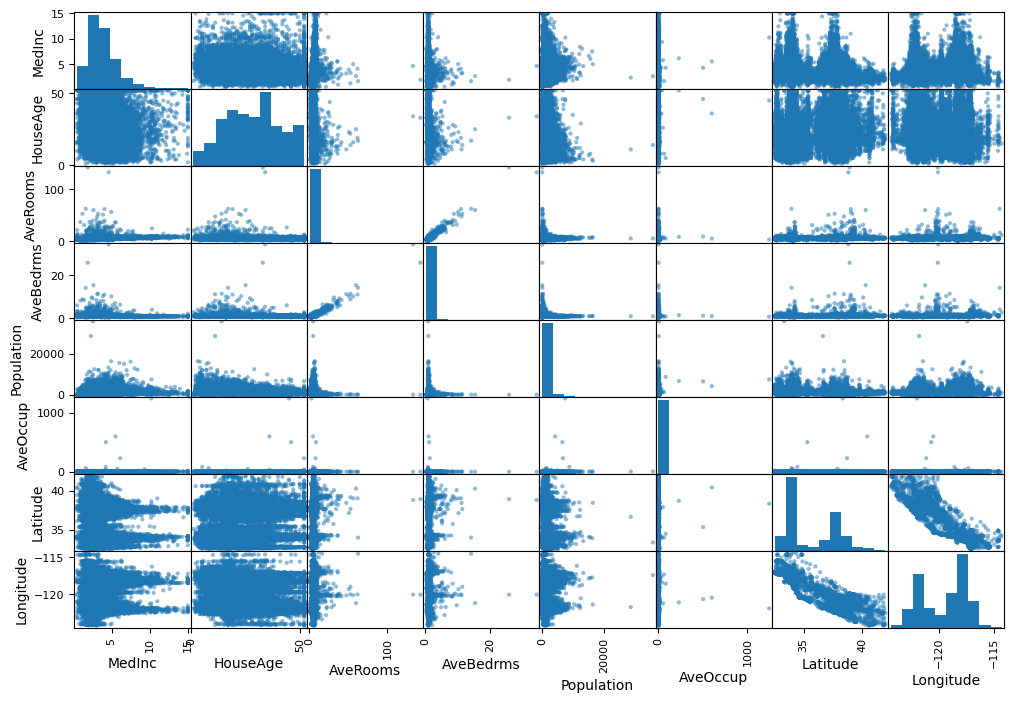

In [46]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], figsize=(12, 8))
plt.show()

# Implementing Linear Regression Using Gradient Descent 

In this programming assigment (lab), you will be implementing the Linear Regression Model. We will be using the gradient descent algorithm (GDA) to minimize the cost function we discussed in class.  You have the option to also implement the stochastic gradient descent algorithm (SGDA) to minimize the cost function at the end of this notebook.


## Cost Function.
Compute the cost:$$J({\bf w})=\frac{1}{2N}\sum_{i=1}^N(\hat{y}^{(i)}-y^{(i)})^2$$

 Write the code to compute the cost inside the function. 



Do not change the function name or function parameters.

In [67]:
# TODO Q06
def compute_cost(X_1, y, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    cost= (1/(2*N))*np.sum((X_1.dot(w)-y)**2)
    return cost

In [ ]:
grader.check("Q06")

Before moving ahead, ensure that the code you have written to compute the cost is correct. Just run the below cell.

In [68]:
w_testcase=np.zeros((9,1))
cost_verify= compute_cost(X_1, y_2d, w_testcase, N)
print("cost_verify: ", cost_verify)

cost_verify:  2.8052415994936264


Your output should be equal to 2.8052415994936264. If it's equal to this, then move ahead. Else, re-check your code and re-verify.

## Gradient Descent
Write the code to perform gradient descent in the function below.  

Remember, the **vectorized gradient** is:

$$  \frac{1}{N} {X}^T ({X} \mathbf{w} - \mathbf{y}) $$

where:
- $X$ is the **design matrix** augmented with a column of ones (size \( N \times (d +1)\))
- $\mathbf{w} $ is the **weight/coefficent vector** (size \( (d +1 )\times 1 \))
- $\mathbf{y} $ is the **target/label vector** (size \( N \times 1 \))
- $\alpha$ is the **learning rate**
- $N$ is the **number of training examples**

When writing the code, use the variable names assigned in the previous code.

In [82]:
# TODO Q07
def gradient_descent(X_1 , y , learning_rate , w , N , num_iters):
    # In place of ellipsis, write the updated value of the coefficients. 
    # Finish the gradient descent function
    for i in range(num_iters):
        # You may add your own variables
        # You can break the computation into multiple steps or keep it in a single line—whichever works best for you.

        
        w = w - learning_rate * (1 / N) * X_1.T.dot(X_1.dot(w)-y)

        if(i%100==0):
            # In place of ellipsis, call the cost you just coded above
            cost= compute_cost(X_1, y, w, N)
            
            # You can uncomment the print statements below to observe how the cost changes.  
            # However, before submitting or running the `multiple_linear_reg_model_gda` function  
            # (which you will implement below), please ensure that all print statements are commented out.  
            # print("Cost")
            # print(cost)
            
    return w

In [ ]:
grader.check("Q07")

Before moving ahead, ensure that your code to update $\bf w$ is correct. Run the code cell below.

In [88]:
w_testcase = np.zeros((9,1))
g = gradient_descent(X_1, y_2d, 0.01, w_testcase, N, 10000)
print("g[0]: ", g[0])

g[0]:  [2.06855817]


The last cost should be: 0.26216121644573653. If it matches your out, then your code is likely to be correct. Otherwise, re-check your code and re-verify.

## The Batch Gradient Descent Function 

Combine the steps into a single function, `multiple_linear_reg_model_gda`, which:
* Initializes $\bf w$ to zero
* Computes the **initial and final cost** using your previously implememted **compute_cost** function
* Runs your `gradient_descent` function to minimize the cost.

In [108]:
# TODO 08
# Complete the function
def multiple_linear_reg_model_gda(X_1, y, N, learning_rate, num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    w = np.zeros((X_1.shape[1], 1))

    #calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y, w, N)
    print("Initial Cost")
    print(initial_cost)

    #calculate the optimized value of gradients by calling the gradient_descent function coded above 
    w = gradient_descent(X_1, y, learning_rate, w, N, num_iters)

    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.    
    final_cost = compute_cost(X_1, y, w, N)
    print("Final Cost")
    print(final_cost)

    return w, initial_cost, final_cost

In [ ]:
grader.check("Q08")

Now, when you have coded `multiple_linear_reg_model_gda` function, you can call this function to find the optimized values of parameters `w`. Before calling the function, set the values of `learning_rate` and `num_iters`. You may have to call this function several number of times with different values of num_iters and learning_rate to find the optimal values of `w`. For some values of `learning_rate`, it may give an error as the values of cost may reach a very high value(infinity) due to overshooting as discussed in the class. 

In [111]:
# TODO Q09
# Call the multiple_linear_reg_model_gda.
learning_rate = 0.01
num_iters = 10000
results = multiple_linear_reg_model_gda(X_1,y_2d, N, learning_rate, num_iters)

w = results[0]
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

# The value of final cost should be 0.26216115363575965 or nearly this(depending on the values of learning_rate and num_itersations you choose.)

Initial Cost
2.8052415994936264
Final Cost
0.26216115363575965
w:  [[ 2.06855817]
 [ 0.83085958]
 [ 0.11902043]
 [-0.26780241]
 [ 0.30754809]
 [-0.00442132]
 [-0.03937545]
 [-0.89676164]
 [-0.86755806]] 
initial cost:  2.8052415994936264 
final cost:  0.26216115363575965


In [ ]:
grader.check("Q09")

---------------------------------------------------------------------------------------------------------------------

You have finished the first part of the asssignment, feel free to take a break and come back to do the second part

# Predicting the Median Price of a House in a Block

Now you should have found (close to) the optimal values for `w0`, `w1`, `w2`, `w3`, ... `w8`.  Once you have the optimal values for the parameters, you can predict the value of `y` (median price) using `x` . Assume `x` has not yet be augmented with an extra `1`'.  Compute the function below to prdict `y`, using `x`, `w0` and `w1`, `w2`, `w3`, ..., `w8`.

In [ ]:
# TODO Q10
# You can add an extra 1 to x or find some other solution for including the intercept (bias) term

def predict(x, w_opt):
    x_aug = ... 
    predicted_y = ...
    
    return predicted_y

In [ ]:
grader.check("Q10")

In [ ]:
# TODO Q11
# Call the predict function with a new
x = np.array([8, 41, 6, 1, 320, 2.5, 38, -122]) # Observe that x is not augmented with a one
# To use our hypothesis, we must first scale x the same way we scaled the training data.

# Before scaling, reshape x to be a 2-dimensional row vector (since our data matrix had each example as a row)
x = ...
# Next, we scale x as we scaled the training data
x_scaled = scale.transform(x)

# Finally, we can predict.
y_predict = ... # SOLUTION
print("The estimated house price is: ", y_predict*100000)

In [ ]:
grader.check("Q11")

# Normal Equation Method
Now, we will be writing the code to find the values of parameters `w` for our multiple linear regression model. This can also be used to cross-check the optimal values of $\bf w$ we just found above using method above. These values should be same (or nearly same).
Instead of writing the code for normal equation in one line, you can break this into parts. (Use `np.linalg.pinv`)

Note : Do not append a column of ones in `X_1` because you have already done this. 

In [ ]:
# TODO Q12
# Write the normal equation method, save the weights to w_vec(<np.ndarray>)

w_vec = ...

print("w_vec: ", w_vec)

In [ ]:
grader.check("Q12")

The Values of beta you just got above should be approximately same as the ones you got using multiple_linear_reg_model_gda.
This assignment ends here.

# Compute coefficients of determination

We next compute the $R^2$ value for your hypothesis.

To do this compute the following:
*  $\hat{y}$ for each training example (it should be one line of code if you use broadcasting)
*  RSS
*  TSS
*  $R^2$


In [ ]:
# Write the code below
# TODO Q13
y_tr_pred = ...
RSS = ...
TSS = ...
R2 = ...
print("RSS = {0:f}".format(RSS))
print("TSS = {0:f}".format(TSS))
print("R^2 = {0:f}".format(R2))

In [ ]:
grader.check("Q13")

# Optional (The following will not be graded):  
# Stochastic Gradient Descent

You can read more about stochastic gradient descent: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

To prevent cycles, shuffle the data for each pass.

Write the code to perform a stochastic gradient descent. Remember, every update in a sgda uses examples one by one.

In [ ]:
def stochastic_gradient_descent(X_1, y, learning_rate, w, N, num_iters):

    for j in range(num_iters):
    
        for i in range(0,N):
        # Write updated value of w
            w = ...

        if(j%2000==0):
            cost= ...
            print("Cost")
            print(cost)
            print("w's")
            print(w)
            
    return w

# Integrating the Stochastic Gradient Descent Algorithm

Use this function to complete linear_reg_model_sgda(). This function uses stochastic gradient descent to minimize the cost.

In [ ]:
def linear_reg_model_sgda(X_1, y, N, learning_rate, num_iters):
    
     #initialize the values of parameters w to be 0
    w = ...
    
    #calculate the initial cost by calling the function cost you just coded above
    print("Initial Cost")
    initial_cost= ...
    print(initial_cost)
    
    #calculate the optimized value of w0 and w1 by calling the stochastic_gradient_descent function coded above
    
    w = ...
    
    #Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    
    final_cost= ...
    print("Final_cost")
    print(final_cost)
    return w, initial_cost, final_cost

In [ ]:
# Write your code below
learning_rate = ...
num_iters = ...
# In place of None call the function linear_reg_model_sgda.
results = ...